<a href="https://colab.research.google.com/github/macodebcn/datascience_samples/blob/main/sleep_health_and_lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Work in Progress

**Note:** This Kaggle notebook is currently a work in progress.

The analyses and models presented here are subject to change!

Here you have the source https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data

And don't forget to give a thumbs up if you download the dataset!



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [ ]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

data['Sleep Disorder'] = imputer.fit_transform(data[['Sleep Disorder']]).ravel()


In [ ]:
data.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


The average age of men is approximately: 37.074074074074076
The average age of women is approximately: 47.4054054054054


<Axes: xlabel='Gender', ylabel='Age'>

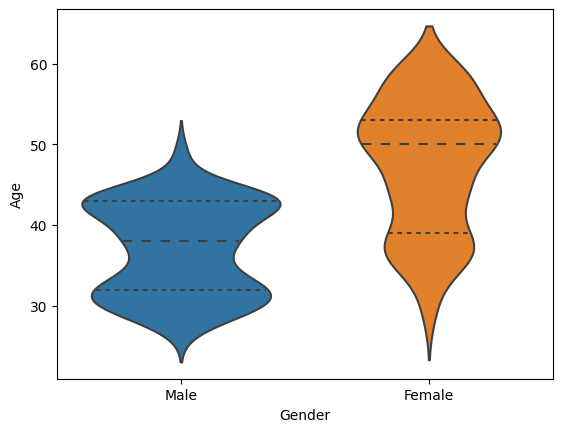

In [ ]:
# let's dive in more into the dataset

# men
average_age_men = data[data['Gender'] == 'Male']['Age'].mean()

# women
average_age_women = data[data['Gender'] == 'Female']['Age'].mean()

print()

# the average ages
print(f"The average age of men is approximately: {average_age_men}")
print(f"The average age of women is approximately: {average_age_women}")

# Violin with quartiles

sns.violinplot(x="Gender", y="Age", data=data, inner="quartile")

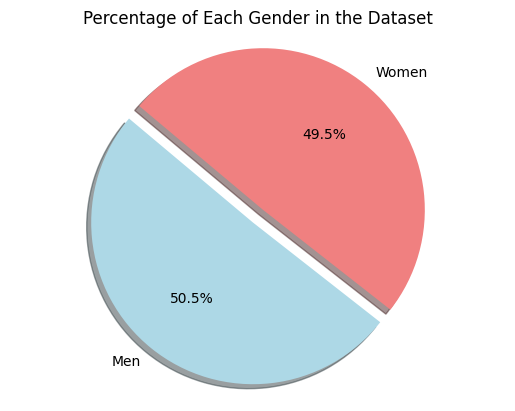

In [ ]:
total_observations = len(data)

# number of observations for each gender

men_count = len(data[data['Gender'] == 'Male'])
women_count = len(data[data['Gender'] == 'Female'])

# percentages

men_percentage = (men_count / total_observations) * 100
women_percentage = (women_count / total_observations) * 100

# data to plot

labels = ['Men', 'Women']
sizes = [men_percentage, women_percentage]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

# the plot 📈

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Percentage of Each Gender in the Dataset')
plt.show()




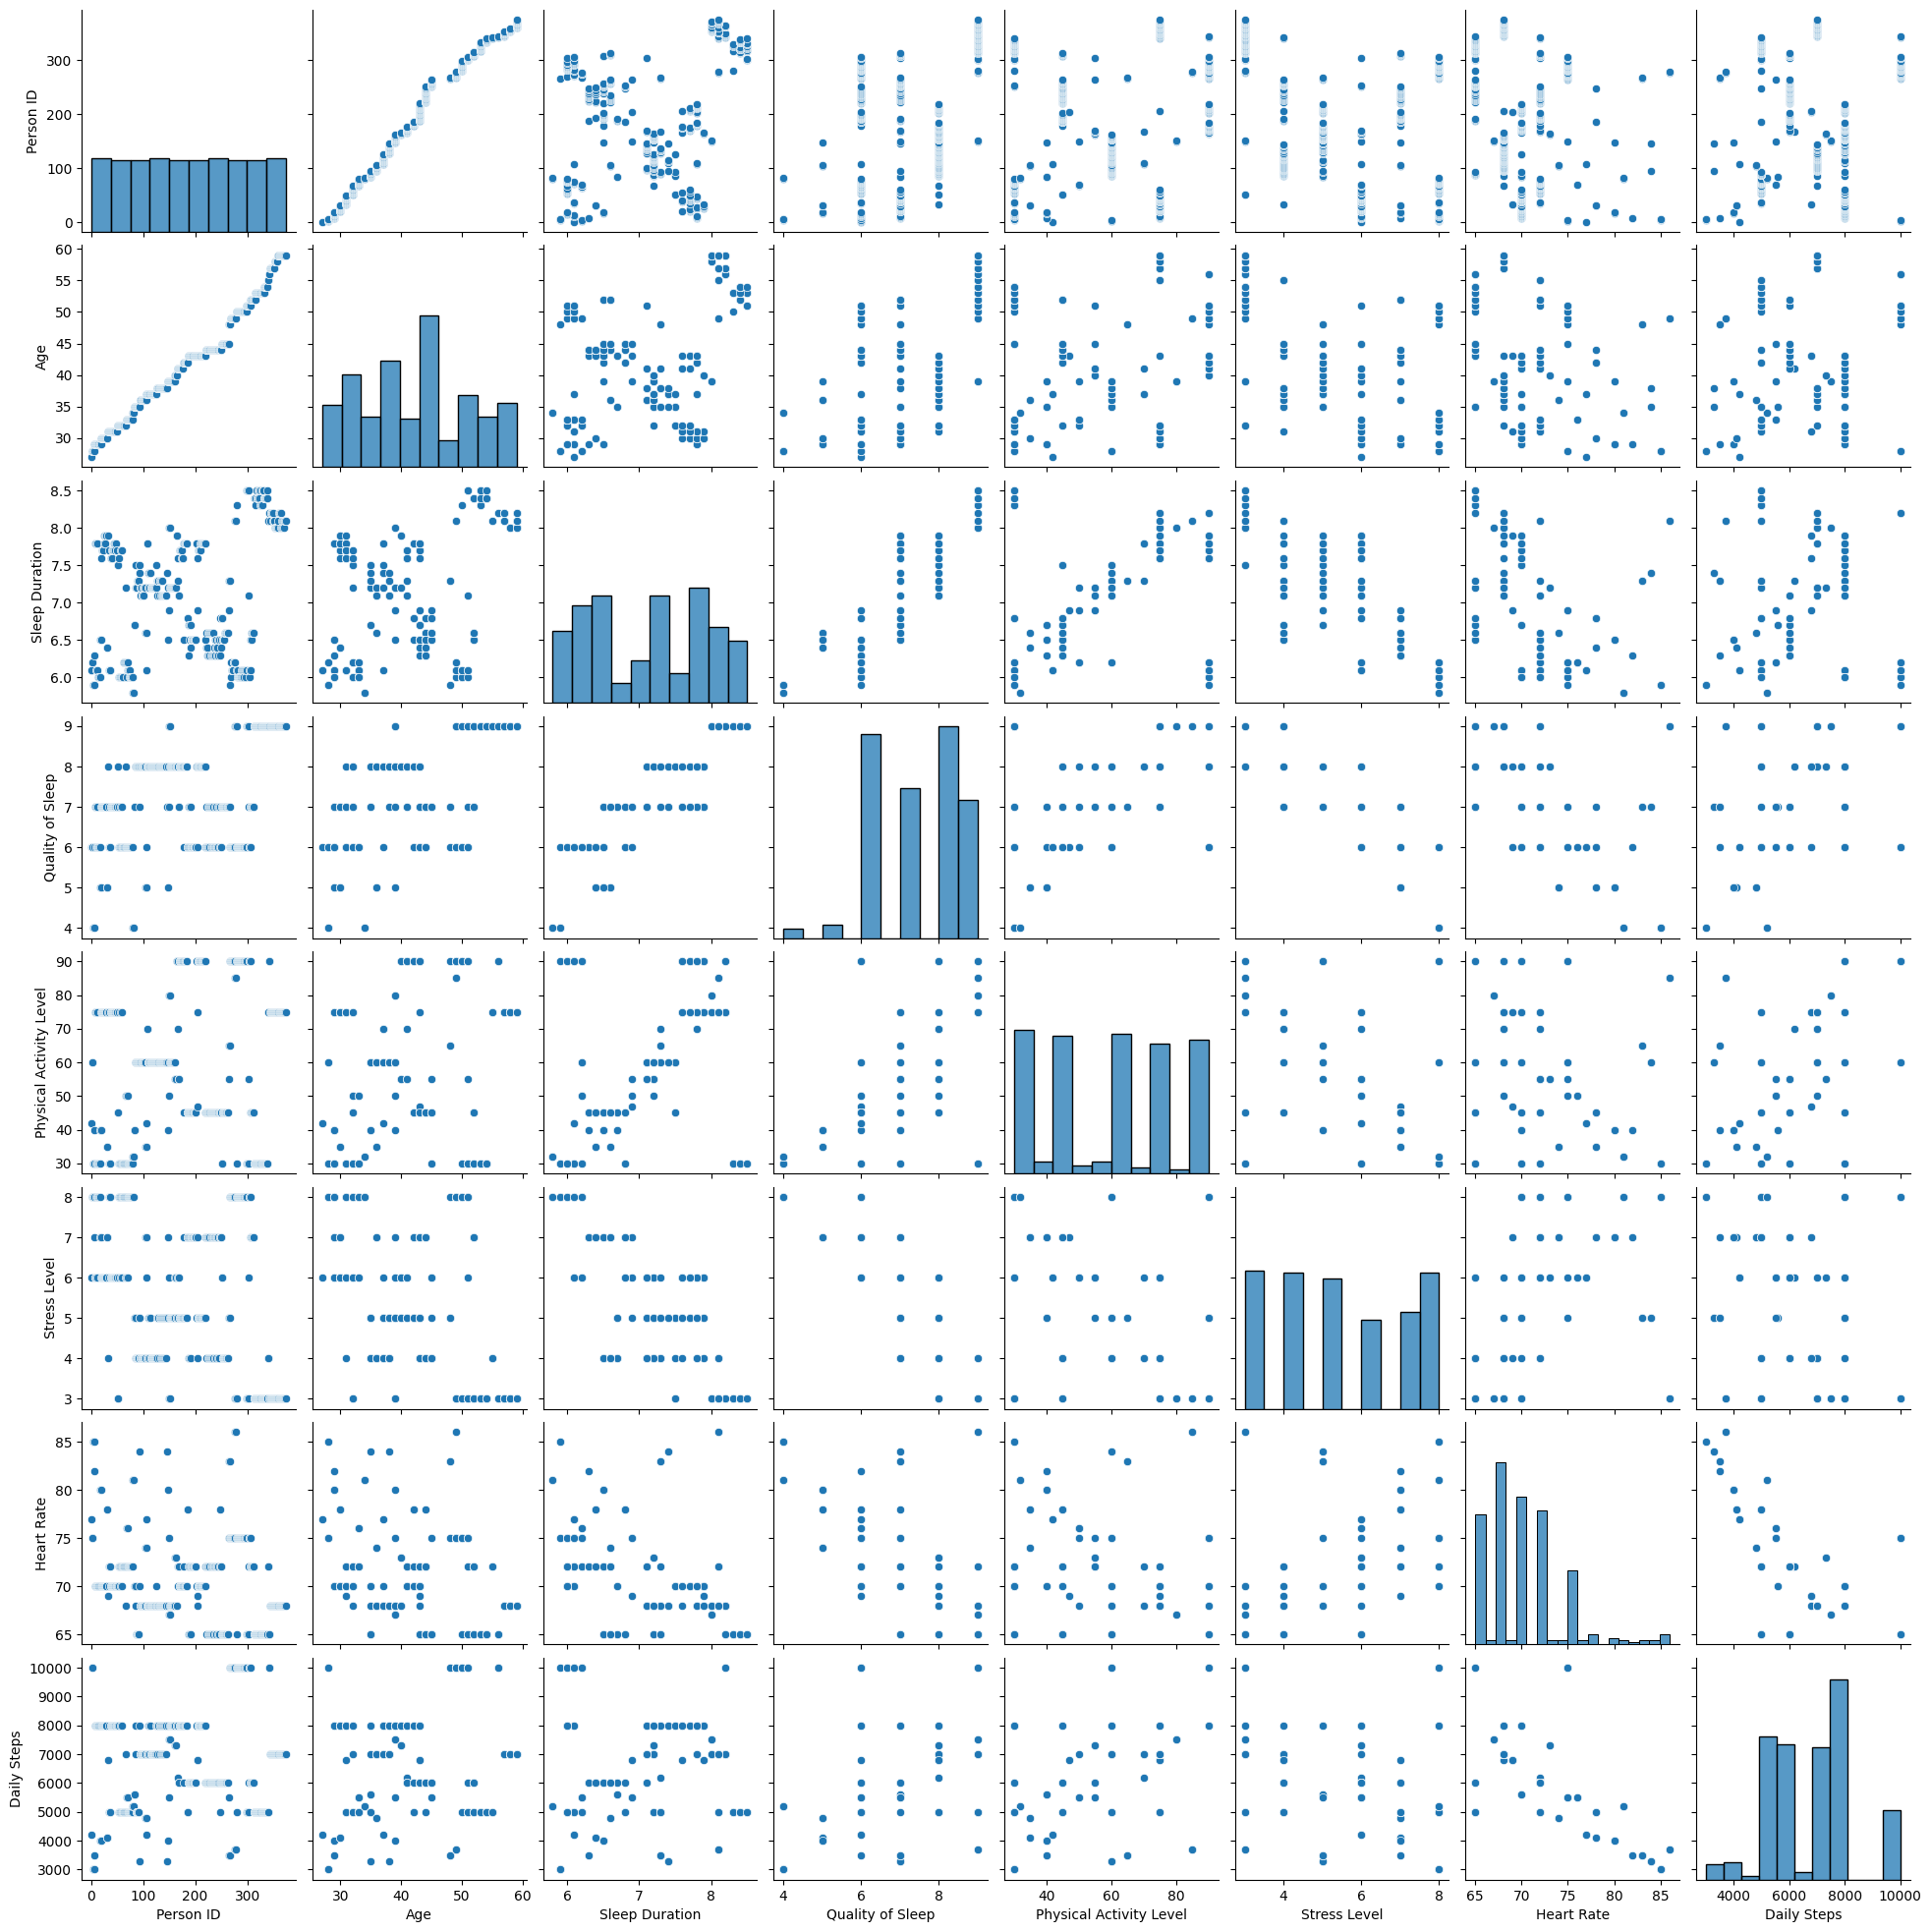

In [ ]:
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

sns.pairplot(data)



#### let's investigate some of the correlations observed...

In [ ]:
# we'll have to deal with some of the categorical columns in order to investigate further...mmm...classic

data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
data.shape

(374, 13)

In [ ]:
# let's create a copy of 'data'
# We create a copy of the DataFrame to keep the original DataFrame intact while we perform some operations on the copy
# this is particularly useful when you are experimenting with the data and you don't want to alter the original DataFrame
# by working on a copy, you can always revert back to your original data if needed,
# it also helps prevent accidental data leakage between different parts of your code

data_copy = data.copy()

# splitting the 'Blood Pressure' column into 'Systolic Pressure' and 'Diastolic Pressure' in the copy

data_copy[['Systolic Pressure', 'Diastolic Pressure']] = data_copy['Blood Pressure'].str.split('/', expand=True)

# converting now the new columns to numeric

data_copy['Systolic Pressure'] = pd.to_numeric(data_copy['Systolic Pressure'])
data_copy['Diastolic Pressure'] = pd.to_numeric(data_copy['Diastolic Pressure'])

# Now you can drop the original 'Blood Pressure' column from the copy

data_copy = data_copy.drop(columns=['Blood Pressure'])



In [ ]:
# let's see...ok, it worked, now we have <Blood Pressure> separated into 2 columns

data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
 12  Systolic Pressure        374 non-null    int64  
 13  Diastolic Pressure       374 non-null    int64  
dtypes: float64(1), int64(9), o

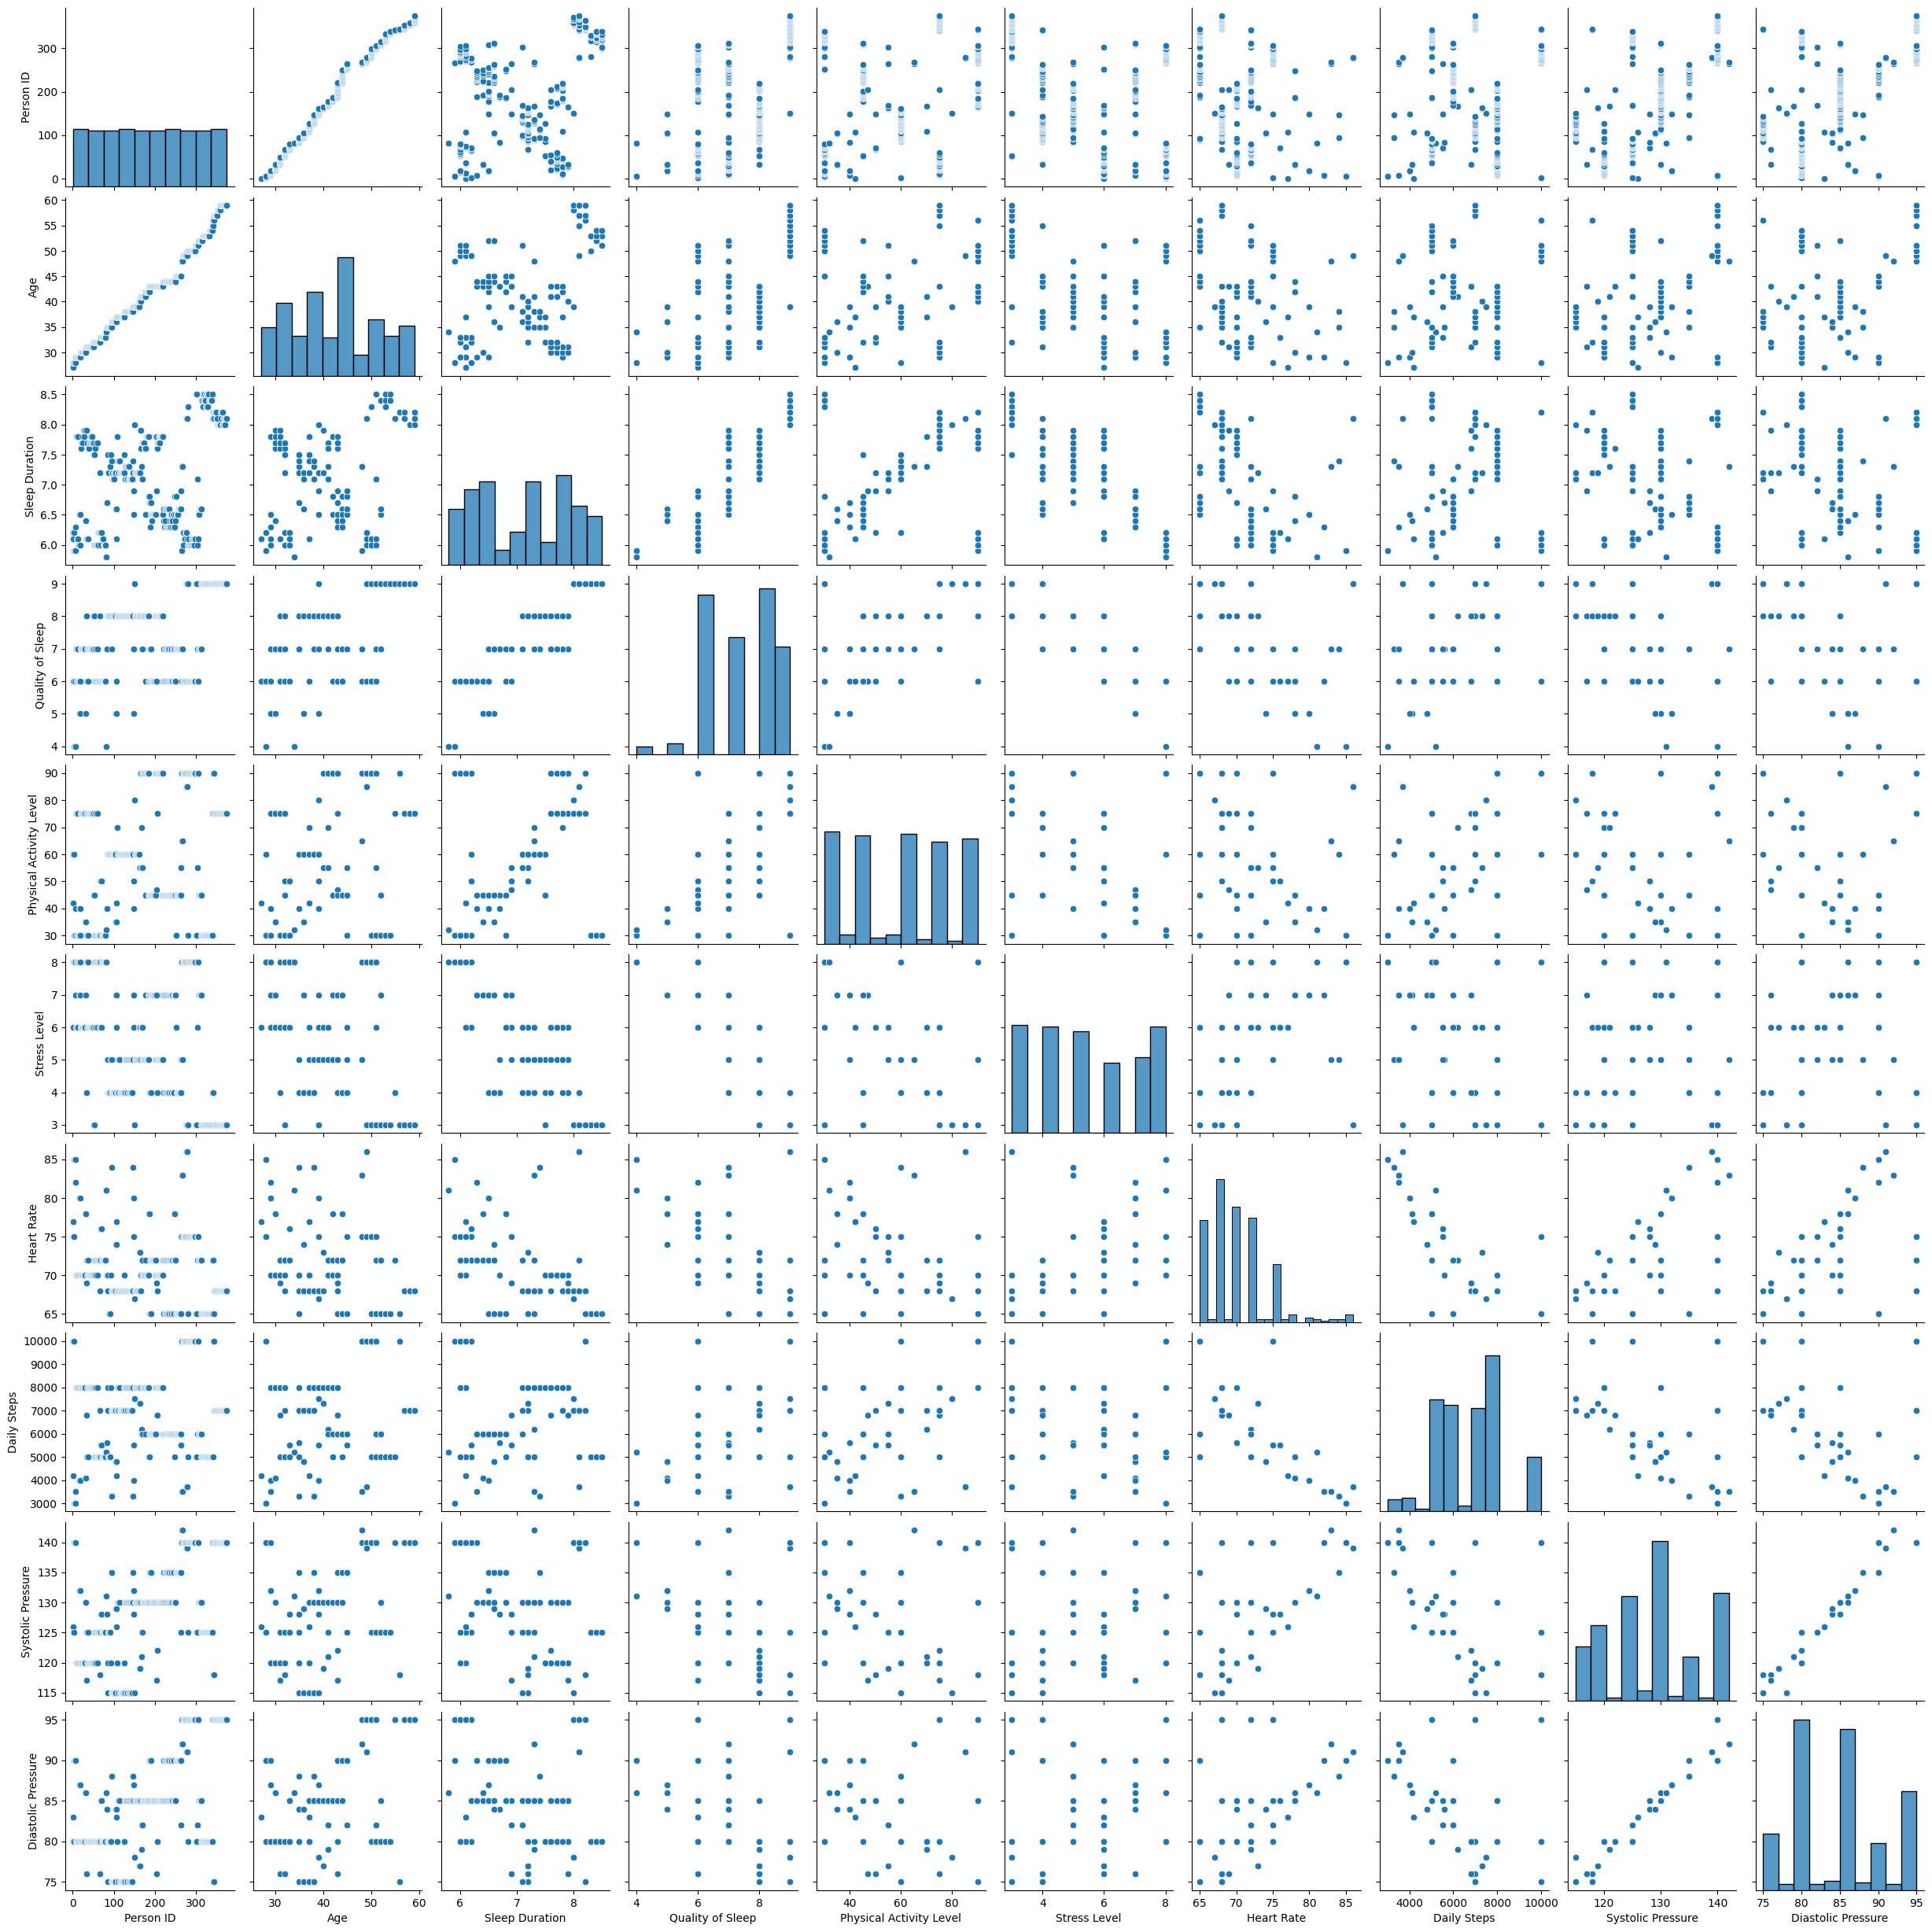

In [ ]:
# let's run again the pairplot code, now with <data_copy> and see the big picture again

import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

sns.pairplot(data_copy)

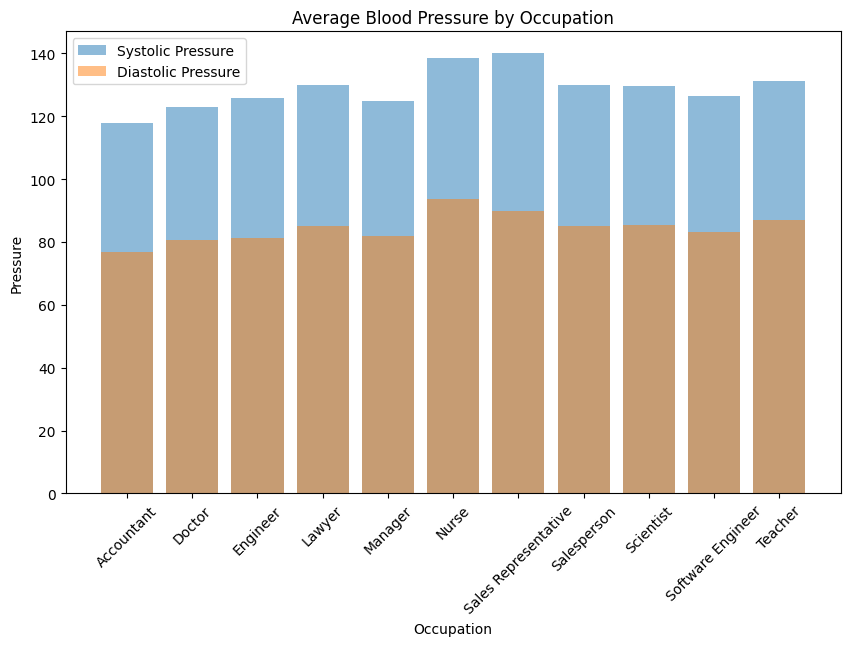

In [ ]:
import matplotlib.pyplot as plt

# let's group the data by 'Occupation' and calculate the mean of the pressures

mean_pressures = data_copy.groupby('Occupation')[['Systolic Pressure', 'Diastolic Pressure']].mean()

# create a new figure

plt.figure(figsize=(10, 6))

# a bar plot for the systolic pressure

plt.bar(mean_pressures.index, mean_pressures['Systolic Pressure'], alpha=0.5, label='Systolic Pressure')

# and a bar plot for the diastolic pressure

plt.bar(mean_pressures.index, mean_pressures['Diastolic Pressure'], alpha=0.5, label='Diastolic Pressure')

# adding labels and title

plt.xlabel('Occupation')
plt.ylabel('Pressure')
plt.title('Average Blood Pressure by Occupation')
plt.legend()

# rotate the x-axis labels to 45 degrees

plt.xticks(rotation=45)

# plot

plt.show()


In [ ]:
## let´s dive into sleep duration and blood pressure...

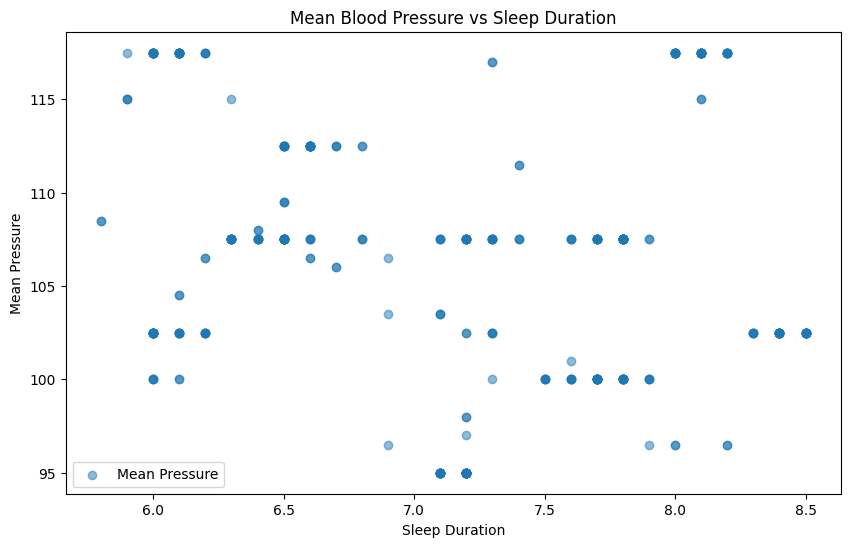

In [ ]:
# mean blood pressure
# We calculate the mean blood pressure because it provides a single measure that represents overall blood pressure levels
# hile systolic and diastolic pressures provide more detailed information,
# the mean pressure can be a more straightforward measure for comparisons or visualizations

data_copy['Mean Pressure'] = (data_copy['Systolic Pressure'] + data_copy['Diastolic Pressure']) / 2

# figure

plt.figure(figsize=(10, 6))

# scatter plot for the mean blood pressure
# let's plot the mean blood pressure because it allows us to visualize the relationship between blood pressure and sleep duration using a single measure of blood pressure

plt.scatter(data_copy['Sleep Duration'], data_copy['Mean Pressure'], alpha=0.5, label='Mean Pressure')

# labels and title to the plot

plt.xlabel('Sleep Duration')
plt.ylabel('Mean Pressure')
plt.title('Mean Blood Pressure vs Sleep Duration')

# adding a legend to the plot

plt.legend()

# showing the plot

plt.show()


In [ ]:
# correlation between 'Sleep Duration' and 'Mean Pressure'

correlation = data_copy['Sleep Duration'].corr(data_copy['Mean Pressure'])

# result

print(f"The correlation between Sleep Duration and Mean Blood Pressure is {correlation}.")

# Observations:
# According to Mayo Clinic (https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/expert-answers/sleep-deprivation/faq-20057959),
# a regular lack of sleep may lead to high blood pressure (hypertension) in both children and adults.
# It is also noted that people who sleep six hours or less may have steeper increases in blood pressure.
# However, since this is not real data, all speculations are valuable for learning to analyze!


The correlation between Sleep Duration and Mean Blood Pressure is -0.1754549911637137.


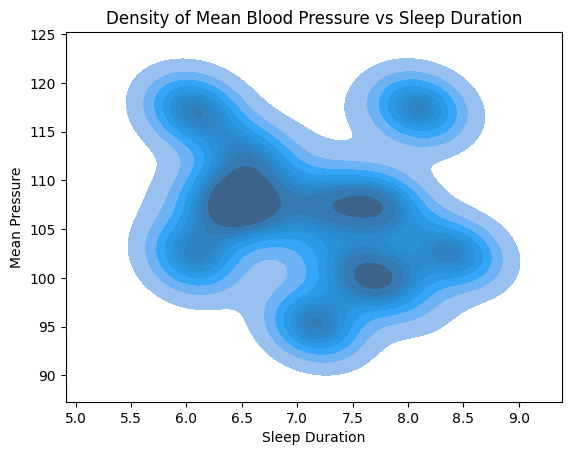

In [ ]:
# let's create a contour plot to have another perspective
# a contour plot can show you areas where the combination of sleep duration and mean blood pressure is more common

sns.kdeplot(data=data_copy, x='Sleep Duration', y='Mean Pressure', fill=True)

# adding labels and title

plt.xlabel('Sleep Duration')
plt.ylabel('Mean Pressure')
plt.title('Density of Mean Blood Pressure vs Sleep Duration')

# as you can see, the upper right zone of the plot shows a higher density of individuals who have longer sleep durations
# and higher mean blood pressure, however, it's important to note that these data are synthetic and created for illustrative purposes
# therefore, they may not reflect real-world trends or patterns
# in general, the plot suggests that the more one sleeps, the lower the mean blood pressure tends to be
# This is in line with some the link above

# Display the plot
plt.show()


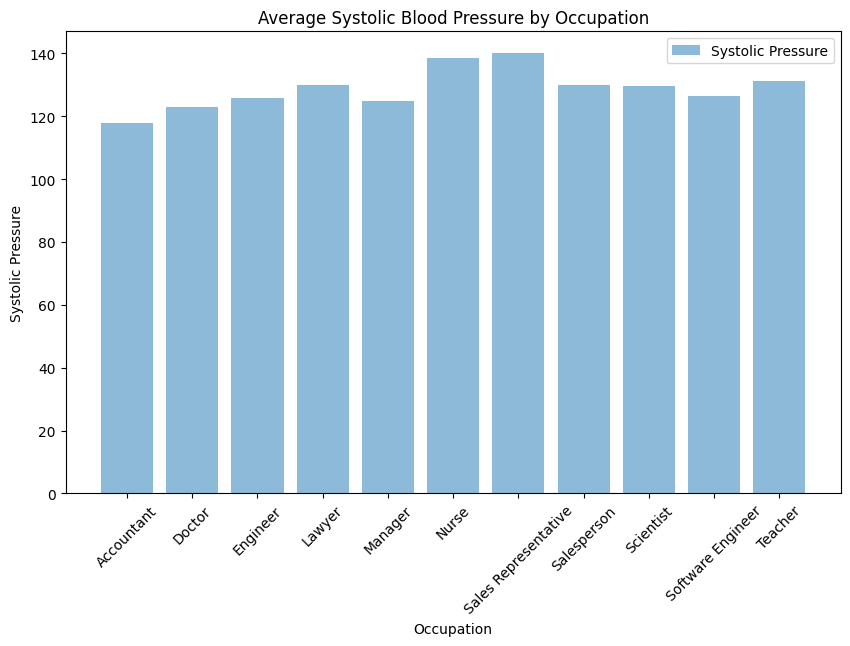

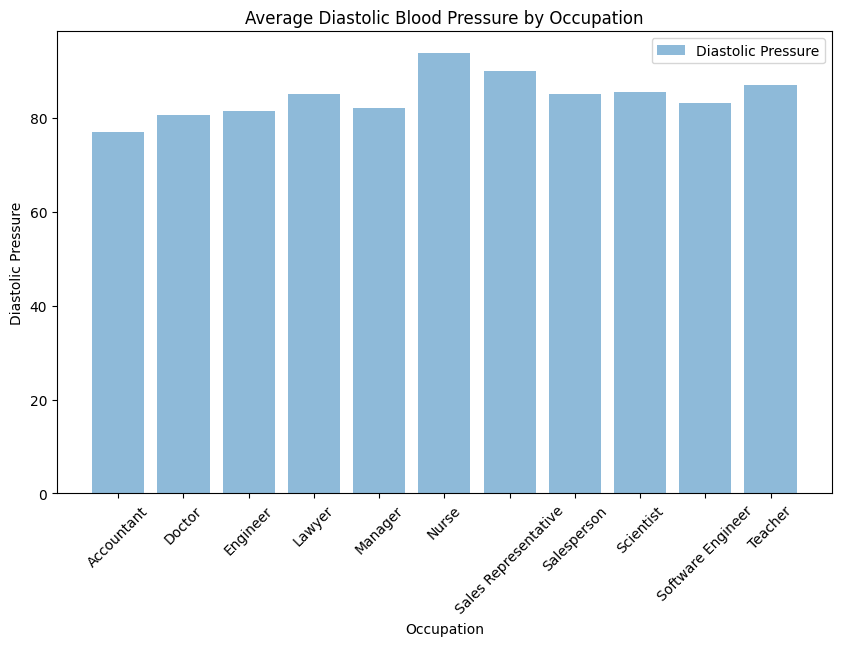

In [ ]:
# so...

# grouping the data by 'Occupation' and calculate the mean of the pressures

mean_systolic_pressure = data_copy.groupby('Occupation')['Systolic Pressure'].mean()
mean_diastolic_pressure = data_copy.groupby('Occupation')['Diastolic Pressure'].mean()

# new figure

plt.figure(figsize=(10, 6))

# bar plot for the systolic pressure

plt.bar(mean_systolic_pressure.index, mean_systolic_pressure, alpha=0.5, label='Systolic Pressure')

# labels and title

plt.xlabel('Occupation')
plt.ylabel('Systolic Pressure')
plt.title('Average Systolic Blood Pressure by Occupation')
plt.legend()

# rotate the x-axis labels to 45 degrees for better readability

plt.xticks(rotation=45)

# plot

plt.show()

print()

# a new figure

plt.figure(figsize=(10, 6))

# a bar plot for the diastolic pressure

plt.bar(mean_diastolic_pressure.index, mean_diastolic_pressure, alpha=0.5, label='Diastolic Pressure')

# labels and title

plt.xlabel('Occupation')
plt.ylabel('Diastolic Pressure')
plt.title('Average Diastolic Blood Pressure by Occupation')
plt.legend()

# rotate the x-axis labels to 45 degrees for better readability

plt.xticks(rotation=45)

# plot

plt.show()


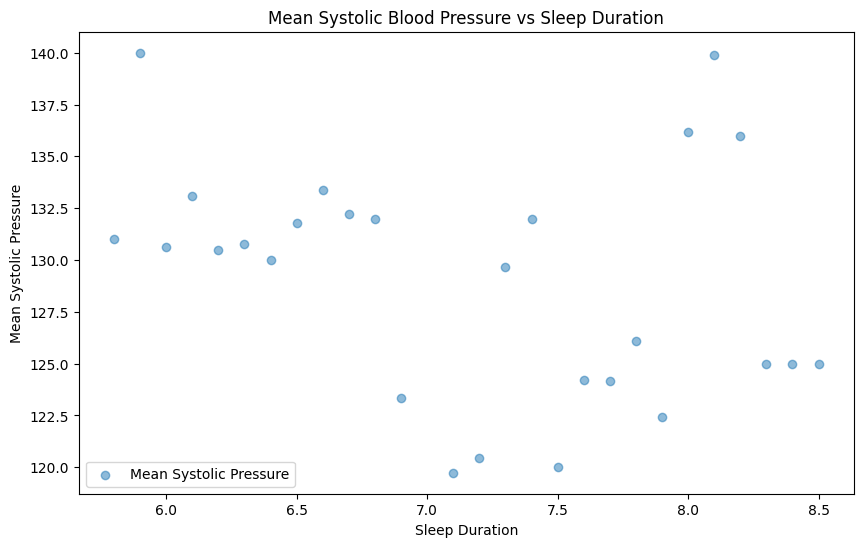

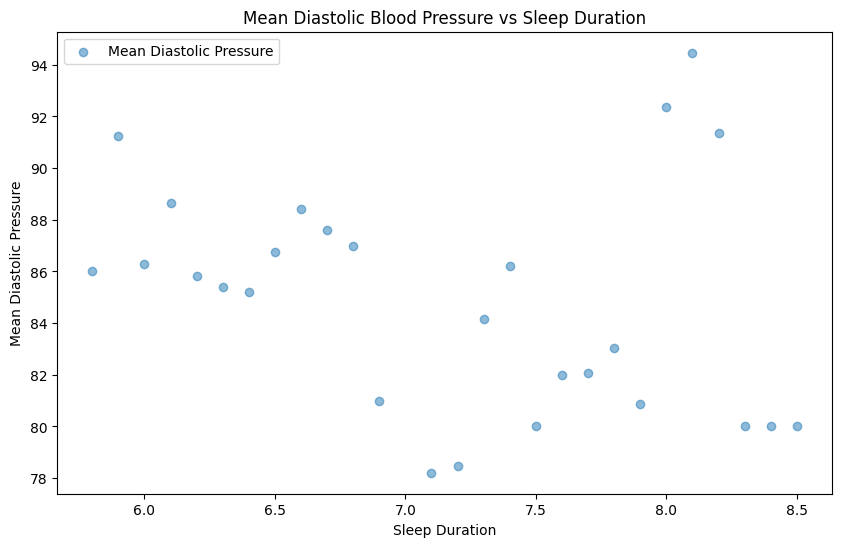

In [ ]:
import matplotlib.pyplot as plt

# grouping the data by 'Sleep Duration' and calculate the mean of the pressures

mean_systolic_pressure = data_copy.groupby('Sleep Duration')['Systolic Pressure'].mean()
mean_diastolic_pressure = data_copy.groupby('Sleep Duration')['Diastolic Pressure'].mean()

# figure

plt.figure(figsize=(10, 6))

# scatter plot for the mean systolic pressure

plt.scatter(mean_systolic_pressure.index, mean_systolic_pressure, alpha=0.5, label='Mean Systolic Pressure')

# labels and title

plt.xlabel('Sleep Duration')
plt.ylabel('Mean Systolic Pressure')
plt.title('Mean Systolic Blood Pressure vs Sleep Duration')
plt.legend()

# plot

plt.show()

print()

# new figure

plt.figure(figsize=(10, 6))

# scatter plot for the mean diastolic pressure

plt.scatter(mean_diastolic_pressure.index, mean_diastolic_pressure, alpha=0.5, label='Mean Diastolic Pressure')

# adding labels and title

plt.xlabel('Sleep Duration')
plt.ylabel('Mean Diastolic Pressure')
plt.title('Mean Diastolic Blood Pressure vs Sleep Duration')
plt.legend()

# showing the plot

plt.show()


### let's create a model to see what would happen if they sleep <= than 6 hours...

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# filtering the data to include only those rows where Sleep Duration is less or equal than 6 hours
filtered_data_systolic = data_copy[data_copy['Sleep Duration'] <= 6]
filtered_data_diastolic = data_copy[data_copy['Sleep Duration'] <= 6]

# defining the predictor variable (Sleep Duration) and the response variable (Systolic Pressure and Diastolic Pressure)

X_systolic = filtered_data_systolic[['Sleep Duration']]
y_systolic = filtered_data_systolic['Systolic Pressure']

X_diastolic = filtered_data_diastolic[['Sleep Duration']]
y_diastolic = filtered_data_diastolic['Diastolic Pressure']

# linear Regression models

model_systolic = LinearRegression()
model_diastolic = LinearRegression()

# fitting the models to the data

model_systolic.fit(X_systolic, y_systolic)
model_diastolic.fit(X_diastolic, y_diastolic)

# predictions

sleep_duration_to_predict = pd.DataFrame({'Sleep Duration': [6]})
predicted_systolic_pressure = model_systolic.predict(sleep_duration_to_predict)
predicted_diastolic_pressure = model_diastolic.predict(sleep_duration_to_predict)

print(f"The estimated systolic blood pressure for a sleep duration of 6 hours is {predicted_systolic_pressure[0]}")
print(f"The estimated diastolic blood pressure for a sleep duration of 6 hours is {predicted_diastolic_pressure[0]}")


The estimated systolic blood pressure for a sleep duration of 6 hours is 131.0315789473684
The estimated diastolic blood pressure for a sleep duration of 6 hours is 86.50526315789472


In [ ]:
# filtering the data to include only those rows where Occupation is 'Nurse'

filtered_data_systolic = data_copy[data_copy['Occupation'] == 'Nurse']
filtered_data_diastolic = data_copy[data_copy['Occupation'] == 'Nurse']

# defining the predictor variable (Sleep Duration) and the response variable (Systolic Pressure and Diastolic Pressure)

X_systolic = filtered_data_systolic[['Sleep Duration']]
y_systolic = filtered_data_systolic['Systolic Pressure']

X_diastolic = filtered_data_diastolic[['Sleep Duration']]
y_diastolic = filtered_data_diastolic['Diastolic Pressure']

# linear Regression models

model_systolic = LinearRegression()
model_diastolic = LinearRegression()

# fitting the models to the data

model_systolic.fit(X_systolic, y_systolic)
model_diastolic.fit(X_diastolic, y_diastolic)

# define sleep_duration_to_predict

sleep_duration_to_predict = pd.DataFrame({'Sleep Duration': [6]})

# predictions

predicted_systolic_pressure = model_systolic.predict(sleep_duration_to_predict)
predicted_diastolic_pressure = model_diastolic.predict(sleep_duration_to_predict)

print(f"For a 'Nurse' with a sleep duration of 6 hours, the estimated systolic blood pressure is {predicted_systolic_pressure[0]}")
print(f"For a 'Nurse' with a sleep duration of 6 hours, the estimated diastolic blood pressure is {predicted_diastolic_pressure[0]}")


For a 'Nurse' with a sleep duration of 6 hours, the estimated systolic blood pressure is 138.4120716882593
For a 'Nurse' with a sleep duration of 6 hours, the estimated diastolic blood pressure is 93.58210043961246


In [ ]:
# Now let's see if being a Doctor is better for your blood pressure!

filtered_data = data_copy[data_copy['Occupation'] == 'Doctor']

# variables

X = filtered_data[['Sleep Duration']]  # Predictor
y_systolic = filtered_data['Systolic Pressure']
y_diastolic = filtered_data['Diastolic Pressure']

# linear Regression models

model_systolic = LinearRegression()
model_diastolic = LinearRegression()

# fitting the models
model_systolic.fit(X, y_systolic)
model_diastolic.fit(X, y_diastolic)

# sleep_duration_to_predict

sleep_duration_to_predict = pd.DataFrame({'Sleep Duration': [6]})

# predictions

predicted_systolic_pressure = model_systolic.predict(sleep_duration_to_predict)
predicted_diastolic_pressure = model_diastolic.predict(sleep_duration_to_predict)

# printing results

print(f"For a 'Doctor' with a sleep duration of 6 hours, the estimated systolic blood pressure is {predicted_systolic_pressure[0]}")
print(f"For a 'Doctor' with a sleep duration of 6 hours, the estimated diastolic blood pressure is {predicted_diastolic_pressure[0]}")





For a 'Doctor' with a sleep duration of 6 hours, the estimated systolic blood pressure is 124.28254864086156
For a 'Doctor' with a sleep duration of 6 hours, the estimated diastolic blood pressure is 80.12664968867689


In [ ]:
data_copy # refreshing the memory...

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Pressure,Diastolic Pressure,Mean Pressure
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,Sleep Apnea,126,83,104.5
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Sleep Apnea,125,80,102.5
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,Sleep Apnea,125,80,102.5
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,115.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,117.5
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,117.5
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,117.5
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95,117.5


In [ ]:
data_copy.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'Systolic Pressure', 'Diastolic Pressure', 'Mean Pressure'],
      dtype='object')

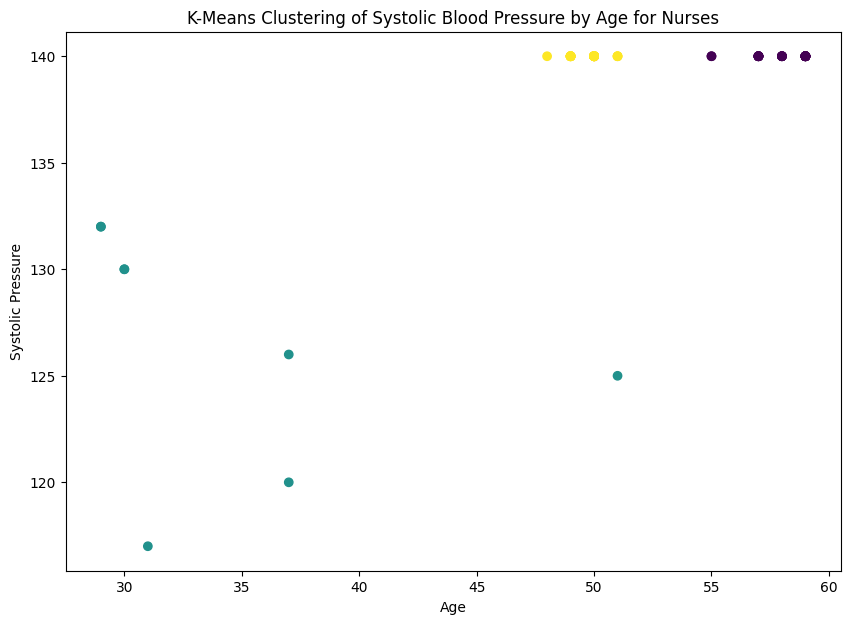

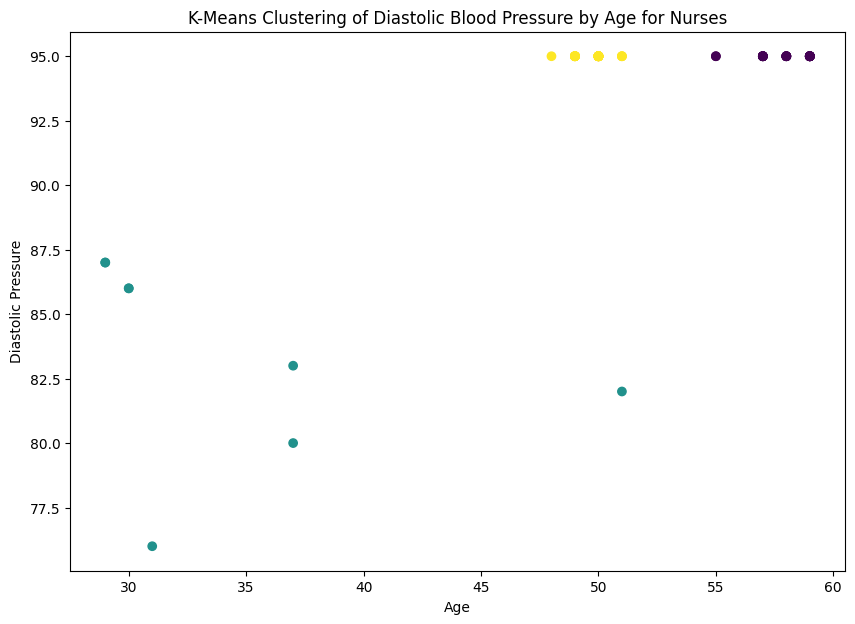

In [ ]:
# let's perform K-Means clustering to understand the distribution of nurses based on their age and blood pressure (both systolic and diastolic).

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# filtering data for the occupation 'Nurse'

filtered_data = data_copy[data_copy['Occupation'] == 'Nurse']

# variables

X = filtered_data[['Age', 'Systolic Pressure', 'Diastolic Pressure']]

# creating a KMeans instance with 3 clusters (it could be other number)

kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the model

kmeans.fit(X)

# cluster assignments

clusters = kmeans.labels_

# plot

plt.figure(figsize=(10, 7))
plt.scatter(X['Age'], X['Systolic Pressure'], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Systolic Pressure')
plt.title('K-Means Clustering of Systolic Blood Pressure by Age for Nurses')
plt.show()

# plot

plt.figure(figsize=(10, 7))
plt.scatter(X['Age'], X['Diastolic Pressure'], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Diastolic Pressure')
plt.title('K-Means Clustering of Diastolic Blood Pressure by Age for Nurses')
plt.show()


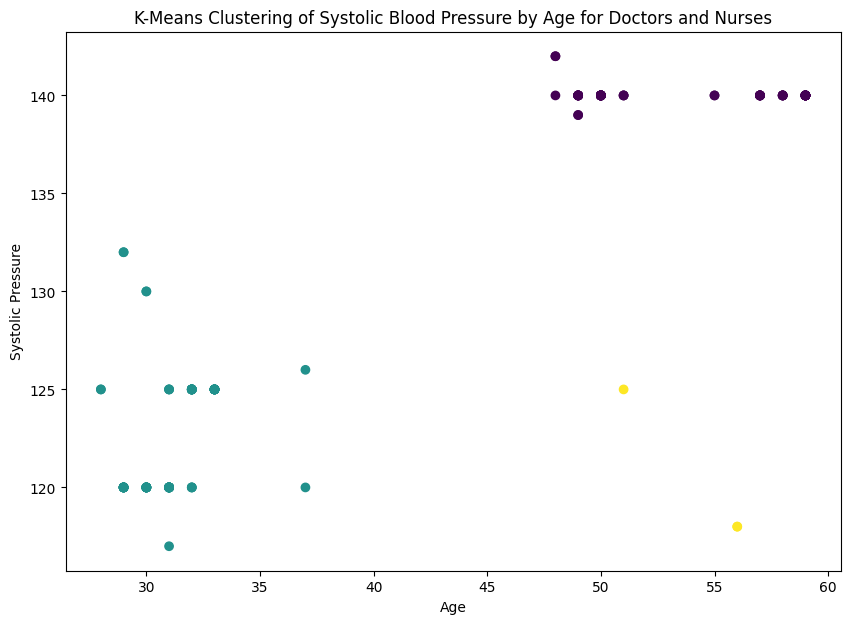

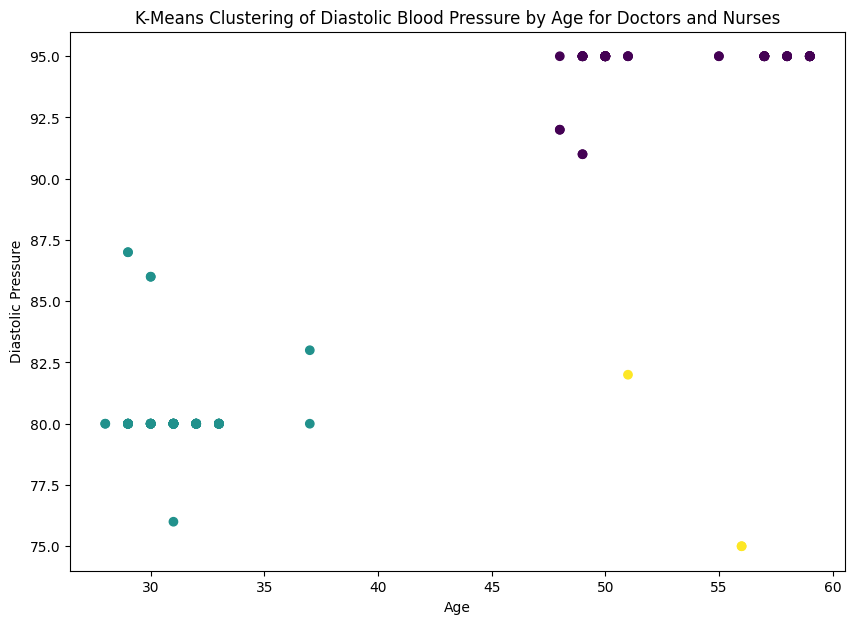

In [ ]:
# let's include now 'Doctor'...

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# filtering  for the occupations 'Doctor' and 'Nurse'

filtered_data = data_copy[data_copy['Occupation'].isin(['Doctor', 'Nurse'])]

# variables

X = filtered_data[['Age', 'Systolic Pressure', 'Diastolic Pressure']]

# Create a KMeans instance with 3 clusters (you can change this number depending on your data)
kmeans = KMeans(n_clusters=3, random_state=0)

# fitting the model

kmeans.fit(X)

# cluster assignments

clusters = kmeans.labels_

# the plot!

plt.figure(figsize=(10, 7))
plt.scatter(X['Age'], X['Systolic Pressure'], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Systolic Pressure')
plt.title('K-Means Clustering of Systolic Blood Pressure by Age for Doctors and Nurses')
plt.show()

# another one bites the clust!

plt.figure(figsize=(10, 7))
plt.scatter(X['Age'], X['Diastolic Pressure'], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Diastolic Pressure')
plt.title('K-Means Clustering of Diastolic Blood Pressure by Age for Doctors and Nurses')
plt.show()


In [ ]:
# mean of heart rate by Occupation

mean_heart_rate = data_copy.groupby('Occupation')['Heart Rate'].mean()

print(mean_heart_rate)


Occupation
Accountant              68.864865
Doctor                  71.521127
Engineer                67.190476
Lawyer                  69.638298
Manager                 75.000000
Nurse                   72.000000
Sales Representative    85.000000
Salesperson             72.000000
Scientist               78.500000
Software Engineer       75.500000
Teacher                 67.225000
Name: Heart Rate, dtype: float64


In [ ]:
mean_steps = data_copy.groupby('Occupation')['Daily Steps'].mean()

print(mean_steps)

Occupation
Accountant              6881.081081
Doctor                  6808.450704
Engineer                5980.952381
Lawyer                  7661.702128
Manager                 5500.000000
Nurse                   8057.534247
Sales Representative    3000.000000
Salesperson             6000.000000
Scientist               5350.000000
Software Engineer       5800.000000
Teacher                 5957.500000
Name: Daily Steps, dtype: float64


In [ ]:
mean_age = data_copy.groupby('Occupation')['Age'].mean()

print(mean_age)

Occupation
Accountant              39.621622
Doctor                  32.676056
Engineer                46.587302
Lawyer                  39.425532
Manager                 45.000000
Nurse                   51.794521
Sales Representative    28.000000
Salesperson             43.531250
Scientist               33.500000
Software Engineer       31.250000
Teacher                 41.725000
Name: Age, dtype: float64


In [ ]:
# correlation between Diastolic Pressure and Heart Rate

correlation = data_copy['Diastolic Pressure'].corr(data_copy['Heart Rate'])
print("Correlation between Diastolic Pressure and Heart Rate:", correlation)

# correlation between Systolic Pressure and Heart Rate

correlation = data_copy['Systolic Pressure'].corr(data_copy['Heart Rate'])
print("Correlation between Systolic Pressure and Heart Rate:", correlation)


Correlation between Diastolic Pressure and Heart Rate: 0.2710922189824594
Correlation between Systolic Pressure and Heart Rate: 0.2941429212564027


In [ ]:
# correlation between Systolic Pressure and Daily Steps

correlation = data_copy['Systolic Pressure'].corr(data_copy['Daily Steps'])
print("Correlation between Systolic Pressure and Daily Steps:", correlation)

# correlation between Diastolic Pressure and Daily Steps

correlation = data_copy['Diastolic Pressure'].corr(data_copy['Daily Steps'])
print("Correlation between Diastolic Pressure and Daily Steps:", correlation)


Correlation between Systolic Pressure and Daily Steps: 0.10334221934166314
Correlation between Diastolic Pressure and Daily Steps: 0.2419859723021413


In [ ]:
# correlation between Age and Systolic Pressure

correlation = data_copy['Age'].corr(data_copy['Systolic Pressure'])
print("Correlation between Age and Systolic Pressure:", correlation)

# correlation between Age and Diastolic Pressure

correlation = data_copy['Age'].corr(data_copy['Diastolic Pressure'])
print("Correlation between Age and Diastolic Pressure:", correlation)


Correlation between Age and Systolic Pressure: 0.6058784440490964
Correlation between Age and Diastolic Pressure: 0.59383892047684


In [ ]:
# correlation between Stress Level and Systolic Pressure

correlation = data_copy['Stress Level'].corr(data_copy['Systolic Pressure'])
print("Correlation between Stress Level and Systolic Pressure:", correlation)

# correlation between Stress Level and Diastolic Pressure

correlation = data_copy['Stress Level'].corr(data_copy['Diastolic Pressure'])
print("Correlation between Stress Level and Diastolic Pressure:", correlation)


# Based on the data analysis performed, it appears that age could be a significant factor to consider when examining blood pressure (both systolic and diastolic).
# The correlation coefficients between age and systolic pressure (0.61), and age and diastolic pressure (0.59), suggest a moderate positive relationship.
# This means that as age increases, both systolic and diastolic blood pressures also tend to increase.
# However, it's important to note that correlation does not imply causation.
# There could be other confounding factors at play.
# Therefore, while age appears to be an important factor, it should be considered alongside other factors when examining blood pressure.
# Next, we will delve into the topic of sleep health and its potential impact on blood pressure or viceversa...
# to be continued...🧐


Correlation between Stress Level and Systolic Pressure: 0.10281815868464628
Correlation between Stress Level and Diastolic Pressure: 0.0918110351386845
